# Name: Prekshita vasudeo patil
# registration No.: 20MAI0073
# Assignment-4 
# Task-1

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split

In [2]:
(xtrain,ytrain),(xtest,ytest) = keras.datasets.cifar10.load_data()
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

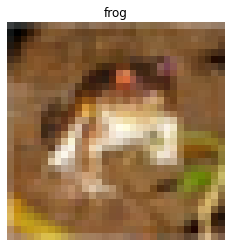

In [3]:
plt.imshow(xtrain[0])
plt.title(classes[ytrain[0][0]],)
plt.axis(False)
plt.show()

In [4]:
#  selecting 50% less data from xtrain
(xtrain_new_50,xtest_new_50,ytrain_new_50,ytest_new_50) =train_test_split(xtrain,ytrain,test_size=0.5,random_state=0)
xtrain_1,xtest_1,ytrain_1,ytest_1 = train_test_split(xtrain_new_50,ytrain_new_50,test_size=0.3,random_state=0)
print("Xtrain orignal :- ",xtrain.shape)
print("Xtrain 50% selected from xtrain:-",xtrain_new_50.shape)
print("70% selected from that 50% training :- ",xtrain_1.shape)

Xtrain orignal :-  (50000, 32, 32, 3)
Xtrain 50% selected from xtrain:- (25000, 32, 32, 3)
70% selected from that 50% training :-  (17500, 32, 32, 3)


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D,Activation,BatchNormalization,MaxPooling2D,Dense,Flatten,Dropout

In [6]:
from keras.utils import to_categorical

ytrain = to_categorical(ytrain,10)
ytrain_new_50 = to_categorical(ytrain_new_50,10)
ytrain_1 = to_categorical(ytrain_1,10)

ytest = to_categorical(ytest,10)
ytest_new_50 = to_categorical(ytest_new_50,10)
ytest_1 = to_categorical(ytest_1,10)

In [7]:
xtrain_1[0].shape

(32, 32, 3)

In [8]:
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=xtrain_1[0].shape, kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# 1st Maxpooling Layer
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# 2nd Maxpooling Layer
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# 3rd Maxpooling Layer
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())

# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
# AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()
# https://cs231n.github.io/transfer-learning/

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 96)          384       
_________________________________________________________________
activation (Activation)      (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 256)         0

In [9]:
AlexNet.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [10]:
# checkpoint = ModelCheckpoint('AlexNet.h5',save_best_only=True, monitor='val_accuracy',mode='max')
history =AlexNet.fit(xtrain_1,ytrain_1,epochs=10,batch_size=32)

Epoch 1/10
547/547 [==============================] - 11s 13ms/step - loss: 1.9141 - accuracy: 0.3003
Epoch 2/10
547/547 [==============================] - 7s 12ms/step - loss: 1.5539 - accuracy: 0.4400
Epoch 3/10
547/547 [==============================] - 7s 12ms/step - loss: 1.4151 - accuracy: 0.5054
Epoch 4/10
547/547 [==============================] - 7s 12ms/step - loss: 1.3250 - accuracy: 0.5396
Epoch 5/10
547/547 [==============================] - 7s 12ms/step - loss: 1.2156 - accuracy: 0.5769
Epoch 6/10
547/547 [==============================] - 7s 12ms/step - loss: 1.1364 - accuracy: 0.6088
Epoch 7/10
547/547 [==============================] - 7s 12ms/step - loss: 1.0408 - accuracy: 0.6458
Epoch 8/10
547/547 [==============================] - 7s 12ms/step - loss: 0.9479 - accuracy: 0.6789
Epoch 9/10
547/547 [==============================] - 7s 12ms/step - loss: 0.8661 - accuracy: 0.7111
Epoch 10/10
547/547 [==============================] - 7s 12ms/step - loss: 0.7642 - accur

In [11]:
history = pd.DataFrame(history.history)

In [12]:
history

,loss,accuracy
0,1.762730,0.356857
1,1.527228,0.451486
2,1.406960,0.505371
3,1.314531,0.535429
4,1.227925,0.571257
5,1.140598,0.604514
6,1.057282,0.639543
7,0.956235,0.673429
8,0.872383,0.707143
9,0.776495,0.740057


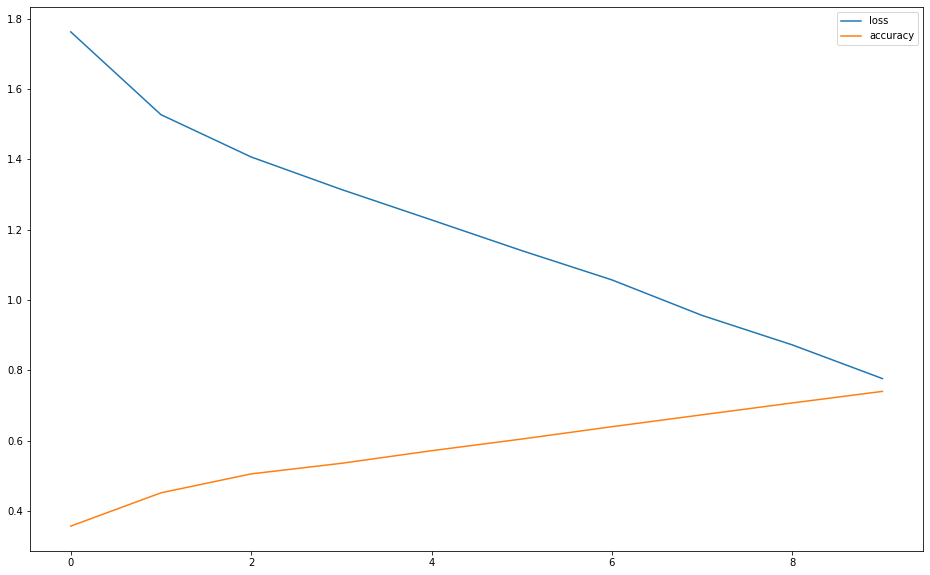

In [13]:
history.plot.line(figsize=(16,10),)

In [14]:
ypred = np.argmax(AlexNet.predict(xtest_1),axis=1)

ytrain = np.argmax(ytrain,axis=1)
ytrain_new_50 = np.argmax(ytrain_new_50,axis=1)
ytrain_1 = np.argmax(ytrain_1,axis=1)

ytest = np.argmax(ytest,axis=1)
ytest_new_50 = np.argmax(ytest_new_50,axis=1)
ytest_1 = np.argmax(ytest_1,axis=1)

In [15]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy_score(ypred,ytest_1)

0.4696

In [16]:
ytrain = to_categorical(ytrain,10)
ytrain_new_50 = to_categorical(ytrain_new_50,10)
ytrain_1 = to_categorical(ytrain_1,10)

ytest = to_categorical(ytest,10)
ytest_new_50 = to_categorical(ytest_new_50,10)
ytest_1 = to_categorical(ytest_1,10)

In [17]:
history =AlexNet.fit(xtrain,ytrain,epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0515 - accuracy: 0.6403
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9427 - accuracy: 0.6777
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8495 - accuracy: 0.7101
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7463 - accuracy: 0.7505
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6588 - accuracy: 0.7788
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5772 - accuracy: 0.8105
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.4984 - accuracy: 0.8361
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.4401 - accuracy: 0.8574
Epoch 9/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3852 - accuracy: 0.8753
Epoch 10/10
1563/1563 [==============================] - 19s 12m

In [18]:
history = pd.DataFrame(history.history)

In [19]:
history

,loss,accuracy
0,1.051510,0.64032
1,0.942745,0.67774
2,0.849459,0.71012
3,0.746287,0.75052
4,0.658829,0.77884
5,0.577167,0.81052
6,0.498385,0.83610
7,0.440125,0.85744
8,0.385194,0.87528
9,0.341448,0.89046


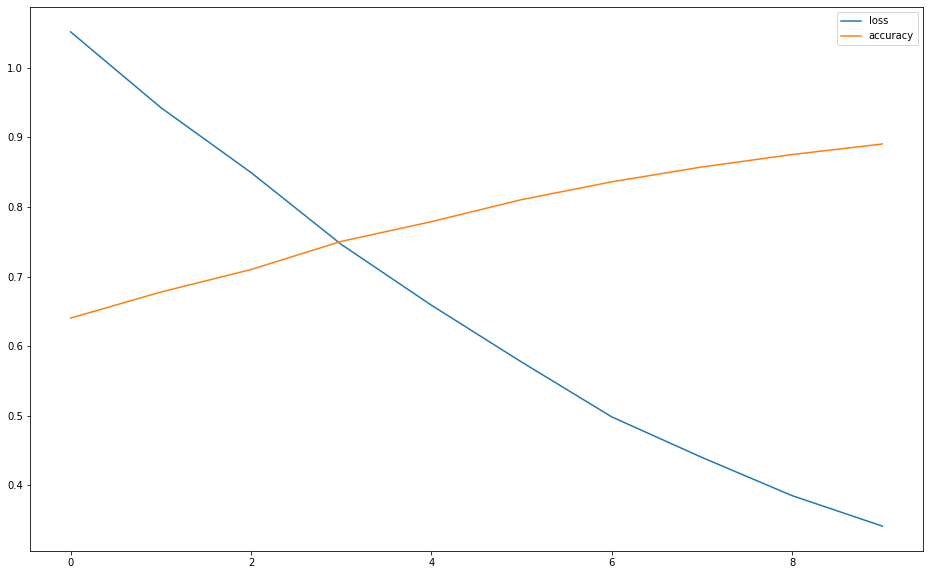

In [20]:
history.plot.line(figsize=(16,10))

In [21]:
ypred = np.argmax(AlexNet.predict(xtest),axis=1)

ytrain = np.argmax(ytrain,axis=1)
ytrain_new_50 = np.argmax(ytrain_new_50,axis=1)
ytrain_1 = np.argmax(ytrain_1,axis=1)

ytest = np.argmax(ytest,axis=1)
ytest_new_50 = np.argmax(ytest_new_50,axis=1)
ytest_1 = np.argmax(ytest_1,axis=1)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy_score(ypred,ytest)

0.6164